In [11]:
from itertools import product
from matplotlib.pyplot import Line2D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from finite_volume.advection import AdvectionSolver
from configs import limiting_schemes_2d, problem_configs, solver_config
from utils import pd_xlsx_write

limiting_schemes = limiting_schemes_2d

viridis = mpl.colormaps["viridis"]


def color_p(p):
    return viridis(p / 7)

In [12]:
data = []
for lckey, p, integrator in product(
    ["aPrioriMPP", "aPrioriT", "aPosteriori", "aPosterioriB"],
    [1, 2, 3, 4, 5, 6, 7],
    ["SSPRK2", "SSPRK3", "RK4"],
):
    print(f"{lckey=}, {p=}, {integrator=}")
    solver = AdvectionSolver(
        n=(64,),
        order=p + 1,
        snapshot_dt=0.1,
        num_snapshots=10,
        **limiting_schemes[lckey],
        **problem_configs["square2d"],
        **solver_config,
    )
    if lckey == "MUSCL-Hancock":
        if p == 1:
            continue
        solver.euler()
    if integrator == "SSPRK2":
        if p != 1:
            continue
        solver.ssprk2()
    elif integrator == "SSPRK3":
        if p < 2:
            continue
        solver.ssprk3()
    elif integrator == "RK4":
        if p < 3:
            continue
        solver.rk4()
    elif integrator == "RK6":
        if p < 4:
            continue
        solver.rk6()
    data.append(
        dict(
            scheme=lckey,
            p=p,
            integrator=integrator,
            delta=solver.compute_mpp_violations()[1]["worst"],
        )
    )
df = pd.DataFrame(data).sort_values(by="p")
df["integrator"] = df["integrator"].astype(
    pd.CategoricalDtype(["SSPRK2", "SSPRK3", "RK4"], ordered=True)
)
df["scheme"] = df["scheme"].astype(
    pd.CategoricalDtype(
        ["aPrioriMPP", "aPrioriT", "aPosteriori", "aPosterioriB"], ordered=True
    )
)

pt = pd.pivot_table(df, index=["p", "integrator"], values="delta", columns="scheme")
pt

lckey='aPrioriMPP', p=1, integrator='SSPRK2'
lckey='aPrioriMPP', p=1, integrator='SSPRK3'
lckey='aPrioriMPP', p=1, integrator='RK4'
lckey='aPrioriMPP', p=2, integrator='SSPRK2'
lckey='aPrioriMPP', p=2, integrator='SSPRK3'
lckey='aPrioriMPP', p=2, integrator='RK4'
lckey='aPrioriMPP', p=3, integrator='SSPRK2'
lckey='aPrioriMPP', p=3, integrator='SSPRK3'
lckey='aPrioriMPP', p=3, integrator='RK4'
lckey='aPrioriMPP', p=4, integrator='SSPRK2'
lckey='aPrioriMPP', p=4, integrator='SSPRK3'
lckey='aPrioriMPP', p=4, integrator='RK4'
lckey='aPrioriMPP', p=5, integrator='SSPRK2'
lckey='aPrioriMPP', p=5, integrator='SSPRK3'
lckey='aPrioriMPP', p=5, integrator='RK4'
lckey='aPrioriMPP', p=6, integrator='SSPRK2'
lckey='aPrioriMPP', p=6, integrator='SSPRK3'
lckey='aPrioriMPP', p=1, integrator='SSPRK2'
lckey='aPrioriMPP', p=1, integrator='SSPRK3'
lckey='aPrioriMPP', p=1, integrator='RK4'
lckey='aPrioriMPP', p=2, integrator='SSPRK2'
lckey='aPrioriMPP', p=2, integrator='SSPRK3'
lckey='aPrioriMPP', p=2, int

lckey='aPosteriori', p=7, integrator='RK4'
lckey='aPosterioriB', p=1, integrator='SSPRK2'
lckey='aPosterioriB', p=1, integrator='SSPRK3'
lckey='aPosterioriB', p=1, integrator='RK4'
lckey='aPosterioriB', p=2, integrator='SSPRK2'
lckey='aPosterioriB', p=2, integrator='SSPRK3'
lckey='aPosterioriB', p=2, integrator='RK4'
lckey='aPosterioriB', p=3, integrator='SSPRK2'
lckey='aPosterioriB', p=3, integrator='SSPRK3'
lckey='aPosterioriB', p=3, integrator='RK4'
lckey='aPosterioriB', p=4, integrator='SSPRK2'
lckey='aPosterioriB', p=4, integrator='SSPRK3'
lckey='aPosterioriB', p=4, integrator='RK4'
lckey='aPosterioriB', p=5, integrator='SSPRK2'
lckey='aPosterioriB', p=5, integrator='SSPRK3'
lckey='aPosterioriB', p=5, integrator='RK4'
lckey='aPosterioriB', p=6, integrator='SSPRK2'
lckey='aPosterioriB', p=1, integrator='SSPRK2'
lckey='aPosterioriB', p=1, integrator='SSPRK3'
lckey='aPosterioriB', p=1, integrator='RK4'
lckey='aPosterioriB', p=2, integrator='SSPRK2'
lckey='aPosterioriB', p=2, integrat

scheme          aPrioriMPP  aPrioriT  aPosteriori  aPosterioriB
p integrator                                                   
1 SSPRK2     -6.791454e-11 -0.000882    -0.008722     -0.004144
2 SSPRK3     -9.926149e-11 -0.013441    -0.010277     -0.001852
3 SSPRK3     -1.722321e-12 -0.013369    -0.011724     -0.002091
  RK4        -5.820566e-11 -0.014655    -0.001362     -0.000313
4 SSPRK3     -9.432330e-12 -0.016113    -0.013041     -0.002053
  RK4        -8.003670e-11 -0.016966    -0.002326     -0.000238
5 SSPRK3     -2.706590e-11 -0.016094    -0.016572     -0.003435
  RK4        -7.349941e-12 -0.017168    -0.003243     -0.000406
6 SSPRK3     -5.685162e-11 -0.017225    -0.014766     -0.002971
  RK4        -2.192226e-11 -0.018006    -0.006696     -0.001116
7 SSPRK3     -3.419761e-11 -0.017212    -0.016531     -0.003406
  RK4        -1.369438e-11 -0.018173    -0.007634     -0.001437

scheme          aPrioriMPP  aPrioriT  aPosteriori  aPosterioriB
p integrator                                                   
1 SSPRK2     -6.791454e-11 -0.000882    -0.008722     -0.004144
2 SSPRK3     -9.926149e-11 -0.013441    -0.010277     -0.001852
3 SSPRK3     -1.722321e-12 -0.013369    -0.011724     -0.002091
  RK4        -5.820566e-11 -0.014655    -0.001362     -0.000313
4 SSPRK3     -9.432330e-12 -0.016113    -0.013041     -0.002053
  RK4        -8.003670e-11 -0.016966    -0.002326     -0.000238
5 SSPRK3     -2.706590e-11 -0.016094    -0.016572     -0.003435
  RK4        -7.349941e-12 -0.017168    -0.003243     -0.000406
6 SSPRK3     -5.685162e-11 -0.017225    -0.014766     -0.002971
  RK4        -2.192226e-11 -0.018006    -0.006696     -0.001116
7 SSPRK3     -3.419761e-11 -0.017212    -0.016531     -0.003406
  RK4        -1.369438e-11 -0.018173    -0.007634     -0.001437

scheme          aPrioriMPP  aPrioriT  aPosteriori  aPosterioriB
p integrator                                                   
1 SSPRK2     -6.791454e-11 -0.000882    -0.008722     -0.004144
2 SSPRK3     -9.926149e-11 -0.013441    -0.010277     -0.001852
3 SSPRK3     -1.722321e-12 -0.013369    -0.011724     -0.002091
  RK4        -5.820566e-11 -0.014655    -0.001362     -0.000313
4 SSPRK3     -9.432330e-12 -0.016113    -0.013041     -0.002053
  RK4        -8.003670e-11 -0.016966    -0.002326     -0.000238
5 SSPRK3     -2.706590e-11 -0.016094    -0.016572     -0.003435
  RK4        -7.349941e-12 -0.017168    -0.003243     -0.000406
6 SSPRK3     -5.685162e-11 -0.017225    -0.014766     -0.002971
  RK4        -2.192226e-11 -0.018006    -0.006696     -0.001116
7 SSPRK3     -3.419761e-11 -0.017212    -0.016531     -0.003406
  RK4        -1.369438e-11 -0.018173    -0.007634     -0.001437

In [13]:
print(pt.to_latex(float_format="%.2e"))

\begin{tabular}{llrrrr}
\toprule
 & scheme & aPrioriMPP & aPrioriT & aPosteriori & aPosterioriB \\
p & integrator &  &  &  &  \\
\midrule
1 & SSPRK2 & -6.79e-11 & -8.82e-04 & -8.72e-03 & -4.14e-03 \\
\cline{1-6}
2 & SSPRK3 & -9.93e-11 & -1.34e-02 & -1.03e-02 & -1.85e-03 \\
\cline{1-6}
\multirow[t]{2}{*}{3} & SSPRK3 & -1.72e-12 & -1.34e-02 & -1.17e-02 & -2.09e-03 \\
 & RK4 & -5.82e-11 & -1.47e-02 & -1.36e-03 & -3.13e-04 \\
\cline{1-6}
\multirow[t]{2}{*}{4} & SSPRK3 & -9.43e-12 & -1.61e-02 & -1.30e-02 & -2.05e-03 \\
 & RK4 & -8.00e-11 & -1.70e-02 & -2.33e-03 & -2.38e-04 \\
\cline{1-6}
\multirow[t]{2}{*}{5} & SSPRK3 & -2.71e-11 & -1.61e-02 & -1.66e-02 & -3.43e-03 \\
 & RK4 & -7.35e-12 & -1.72e-02 & -3.24e-03 & -4.06e-04 \\
\cline{1-6}
\multirow[t]{2}{*}{6} & SSPRK3 & -5.69e-11 & -1.72e-02 & -1.48e-02 & -2.97e-03 \\
 & RK4 & -2.19e-11 & -1.80e-02 & -6.70e-03 & -1.12e-03 \\
\cline{1-6}
\multirow[t]{2}{*}{7} & SSPRK3 & -3.42e-11 & -1.72e-02 & -1.65e-02 & -3.41e-03 \\
 & RK4 & -1.37e-11 & -1.

delta_min=-2.3425718127772885e-20
delta_min=-1.0232268772281861e-19
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
delta_min=-2.3425718127772885e-20
delta_min=-1.0232268772281861e-19
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
delta_min=-2.3425718127772885e-20
delta_min=-1.0232268772281861e-19
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
p=2, lckey='aPrioriMPP', delta=0.0
p=2, lckey='aPosterioriB', delta=-0.0007285902512698342
p=3, lckey='aPrioriMPP', delta=-3.118278066500941e-17
p=3, lckey='aPosterioriB', delta=-0.000684453767925923
p=3, lckey='aPrioriMPP', delta=-3.118278066500941e-17
p=3, lckey='aPosterioriB', delta=-0.000684453767925923
p=5, lckey='aPrioriMPP', delta=-

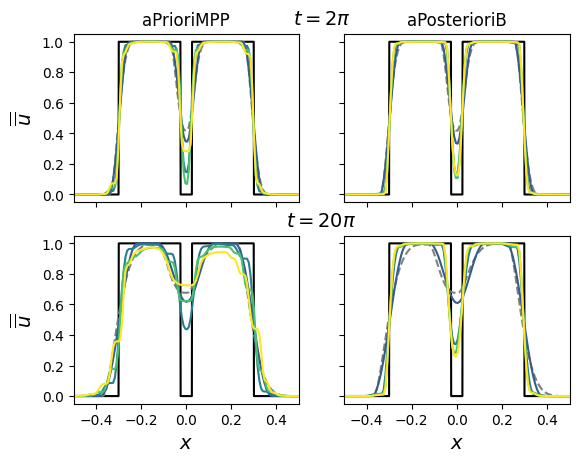

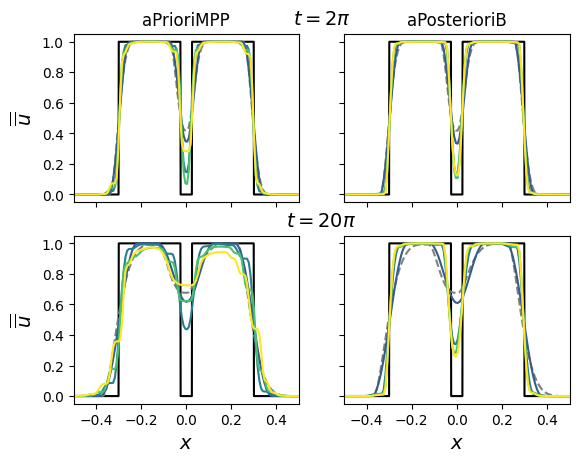

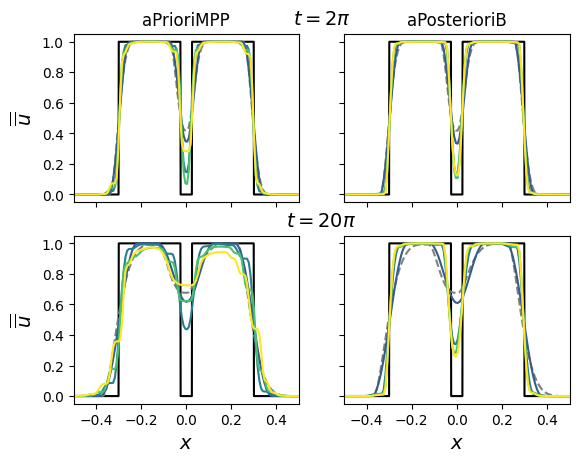

In [14]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

make_legend = False

# plot initial condition
high_res_initial_solver = AdvectionSolver(n=(2048,), **problem_configs["disk"])
for i, j in product(range(2), range(2)):
    high_res_initial_solver.plot_slice(axs[i, j], color="black", y=0.5)
    axs[i, j].set_xlim(-0.5, 0.5)

# plot MUSCL-Hancock solution
for i, (snapshot_dt, num_snapshots) in enumerate(
    [(2 * np.pi / 10, 10), (2 * np.pi, 10)]
):
    solver = AdvectionSolver(
        n=(256,),
        order=2,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        **limiting_schemes["MUSCL-Hancock"],
        **problem_configs["disk"],
        **solver_config,
    )
    solver.euler()
    print(f"delta_min={solver.compute_mpp_violations()[1]['worst']}")
    solver.plot_slice(axs[i, 0], color="grey", linestyle="--", y=0.5)
    solver.plot_slice(axs[i, 1], color="grey", linestyle="--", y=0.5)

# plot high order a priori limited solutions
degrees = [2, 3, 5, 7]

for (p, (i, (snapshot_dt, num_snapshots)), (j, lckey)) in product(
    degrees,
    enumerate([(2 * np.pi / 10, 10), (2 * np.pi, 10)]),
    enumerate(["aPrioriMPP", "aPosterioriB"]),
):
    solver = AdvectionSolver(
        n=(256,),
        order=p + 1,
        snapshot_dt=snapshot_dt,
        num_snapshots=num_snapshots,
        cupy=256,
        **limiting_schemes[lckey],
        **problem_configs["disk"],
        **solver_config,
    )
    if limiting_schemes[lckey].get("apriori_limiting", False):
        solver.highest = 3
    solver.rkorder()
    solver.plot_slice(axs[i, j], color=color_p(p), label=f"${p=}$", y=0.5)
    print(f"{p=}, {lckey=}, delta={solver.compute_mpp_violations()[1]['worst']}")

# cosmetics
fontsize = 14
if make_legend:
    leg = axs[0, 1].legend(loc="center", bbox_to_anchor=(1.35, -0.1), fontsize=fontsize)
    for line, p in zip(leg.get_lines(), degrees):
        line.set_linestyle("none")
        line.set_marker("s")
        line.set_markersize(23)
        line.set_markerfacecolor(color_p(p))
for j in range(2):
    axs[1, j].set_xlabel("$x$", fontsize=fontsize)
for i in range(2):
    axs[i, 0].set_ylabel("$\overline{\overline{u}}$", fontsize=fontsize)
axs[0, 0].set_title("aPrioriMPP")
axs[0, 1].set_title("aPosterioriB")
axs[0, 0].text(
    0.6,
    1.15,
    "$t=2\pi$",
    horizontalalignment="center",
    verticalalignment="center",
    size=fontsize,
)
axs[1, 0].text(
    0.6,
    1.15,
    "$t=20\pi$",
    horizontalalignment="center",
    verticalalignment="center",
    size=fontsize,
)

fig.savefig(
    "images/images_apriori_vs_aposteriori_slottedcylinder.png",
    dpi=300,
    bbox_inches="tight",
)

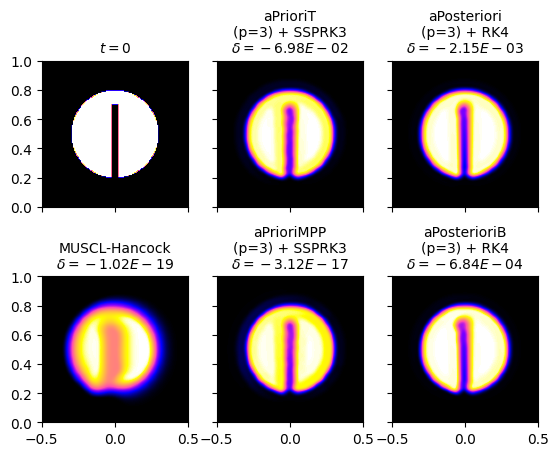

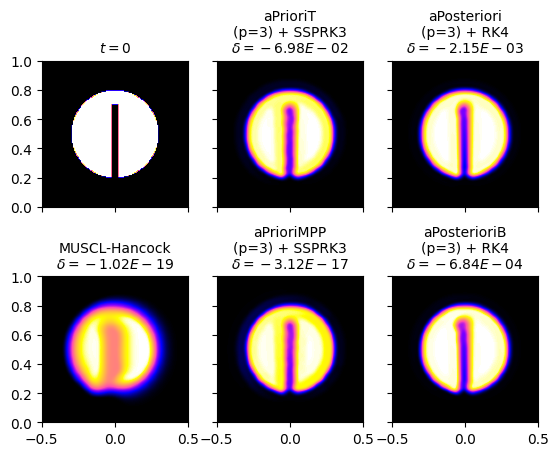

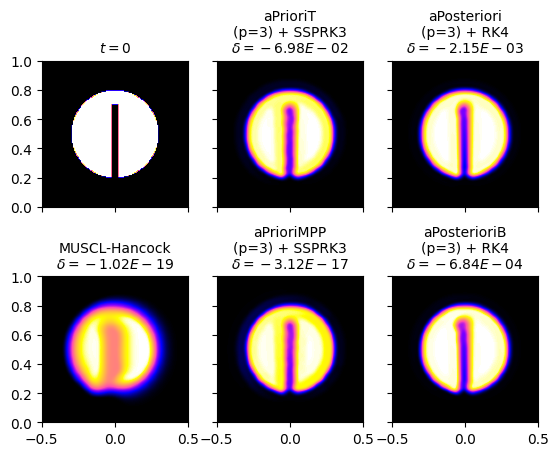

In [15]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

n = 256
p = 3
snapshot_dt = 2 * np.pi
num_snapshots = 10
i = -1
fontsize = 14
cmap = "gnuplot2"
make_colorbar = False

# initial condition
solver = AdvectionSolver(
    n=(n,),
    **problem_configs["disk"],
)
im = solver.plot_map(
    axs[0, 0],
    cmap=cmap,
)
axs[0, 0].set_title("$t=0$", fontsize=10)

# MUSCL-Hancock
solver = AdvectionSolver(
    n=(n,),
    order=2,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["MUSCL-Hancock"],
    **problem_configs["disk"],
    **solver_config,
)
solver.euler()
solver.plot_map(
    axs[1, 0],
    cmap=cmap,
    i=i,
)
axs[1, 0].set_title(
    f"MUSCL-Hancock\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# a priori transverse
solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriT"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[0, 1],
    cmap=cmap,
    i=i,
)
axs[0, 1].set_title(
    f"aPrioriT\n({p=}) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)


# a priori
solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriMPP"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[1, 1],
    cmap=cmap,
    i=i,
)
axs[1, 1].set_title(
    f"aPrioriMPP\n({p=}) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)


# a posteriori
solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosteriori"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[0, 2],
    cmap=cmap,
    i=i,
)
axs[0, 2].set_title(
    f"aPosteriori\n({p=}) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# a postreriori blended
solver = AdvectionSolver(
    n=(n,),
    order=p + 1,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosterioriB"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[1, 2],
    cmap=cmap,
    i=i,
)
axs[1, 2].set_title(
    f"aPosterioriB\n({p=}) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=10,
)

# cosmetics
for i, j in product((0, 1), (0, 1, 2)):
    axs[i, j].set_xlim(-0.5, 0.5)
    axs[i, j].set_ylim(0, 1)

if make_colorbar:
    cb_ax = fig.add_axes([0.95, 0.12, 0.05, 0.75])
    cb = plt.colorbar(im, cax=cb_ax, ax=axs[0, 2])
    cb.set_label(label="$\overline{\overline{u}}$", size=fontsize)
    axs[1, 0].set_xlabel("$x$", fontsize=fontsize)
    axs[1, 1].set_xlabel("$x$", fontsize=fontsize)
    axs[1, 2].set_xlabel("$x$", fontsize=fontsize)
    axs[0, 0].set_ylabel("$y$", fontsize=fontsize)
    axs[1, 0].set_ylabel("$y$", fontsize=fontsize)

plt.subplots_adjust(hspace=0.4)

fig.savefig(
    f"images/images_slottedcylinder_{p=}_cmap.png", dpi=300, bbox_inches="tight"
)

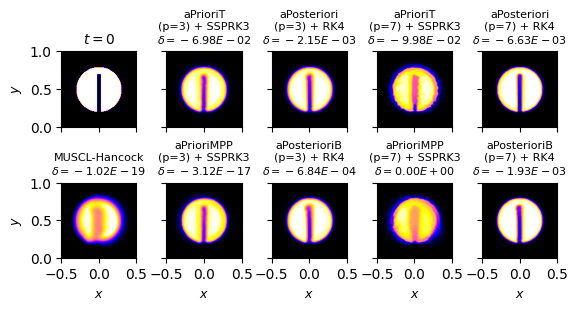

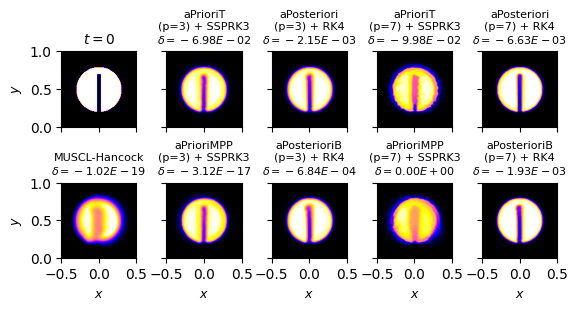

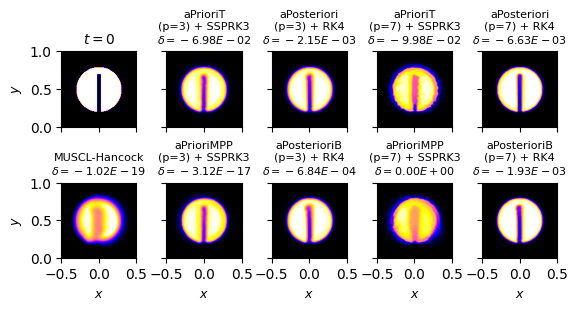

In [20]:
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)

n = 256
p = 3
snapshot_dt = 2 * np.pi
num_snapshots = 10
i = -1
fontsize = 9
label_fontsize = 8
cmap = "gnuplot2"
make_colorbar = False

# initial condition
solver = AdvectionSolver(
    n=(n,),
    **problem_configs["disk"],
)
im = solver.plot_map(
    axs[0, 0],
    cmap=cmap,
)
axs[0, 0].set_title("$t=0$", fontsize=10)

# MUSCL-Hancock
solver = AdvectionSolver(
    n=(n,),
    order=2,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["MUSCL-Hancock"],
    **problem_configs["disk"],
    **solver_config,
)
solver.euler()
solver.plot_map(
    axs[1, 0],
    cmap=cmap,
    i=i,
)
axs[1, 0].set_title(
    f"MUSCL-Hancock\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a priori transverse (p=3)
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriT"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[0, 1],
    cmap=cmap,
    i=i,
)
axs[0, 1].set_title(
    f"aPrioriT\n(p=3) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a priori transverse (p=7)
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriT"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[0, 3],
    cmap=cmap,
    i=i,
)
axs[0, 3].set_title(
    f"aPrioriT\n(p=7) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a priori (p=3)
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriMPP"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[1, 1],
    cmap=cmap,
    i=i,
)
axs[1, 1].set_title(
    f"aPrioriMPP\n(p=3) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a priori (p=7)
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPrioriMPP"],
    **problem_configs["disk"],
    **solver_config,
)
solver.ssprk3()
solver.plot_map(
    axs[1, 3],
    cmap=cmap,
    i=i,
)
axs[1, 3].set_title(
    f"aPrioriMPP\n(p=7) + SSPRK3\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)


# a posteriori (p=3)
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosteriori"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[0, 2],
    cmap=cmap,
    i=i,
)
axs[0, 2].set_title(
    f"aPosteriori\n(p=3) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a posteriori (p=7)
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosteriori"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[0, 4],
    cmap=cmap,
    i=i,
)
axs[0, 4].set_title(
    f"aPosteriori\n(p=7) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a postreriori blended (p=3)
solver = AdvectionSolver(
    n=(n,),
    order=4,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosterioriB"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[1, 2],
    cmap=cmap,
    i=i,
)
axs[1, 2].set_title(
    f"aPosterioriB\n(p=3) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# a postreriori blended (p=7)
solver = AdvectionSolver(
    n=(n,),
    order=8,
    snapshot_dt=snapshot_dt,
    num_snapshots=num_snapshots,
    cupy=256,
    **limiting_schemes["aPosterioriB"],
    **problem_configs["disk"],
    **solver_config,
)
solver.rkorder()
solver.plot_map(
    axs[1, 4],
    cmap=cmap,
    i=i,
)
axs[1, 4].set_title(
    f"aPosterioriB\n(p=7) + RK4\n$\delta={solver.compute_mpp_violations()[1]['worst']:.2E}$",
    fontsize=label_fontsize,
)

# cosmetics
for i, j in product((0, 1), (0, 1, 2)):
    axs[i, j].set_xlim(-0.5, 0.5)
    axs[i, j].set_ylim(0, 1)

if make_colorbar:
    cb_ax = fig.add_axes([0.95, 0.12, 0.05, 0.75])
    cb = plt.colorbar(im, cax=cb_ax, ax=axs[0, 2])
    cb.set_label(label="$\overline{\overline{u}}$", size=label_fontsize)

axs[1, 0].set_xlabel("$x$", fontsize=fontsize)
axs[1, 1].set_xlabel("$x$", fontsize=fontsize)
axs[1, 2].set_xlabel("$x$", fontsize=fontsize)
axs[1, 3].set_xlabel("$x$", fontsize=fontsize)
axs[1, 4].set_xlabel("$x$", fontsize=fontsize)
axs[0, 0].set_ylabel("$y$", fontsize=fontsize)
axs[1, 0].set_ylabel("$y$", fontsize=fontsize)

plt.subplots_adjust(hspace=-0.45, wspace=0.4)

fig.savefig(f"images/images_slottedcylinder_cmap.png", dpi=300, bbox_inches="tight")